## Index
 ### 1. 결측치 확인
 ### 2. 데이터 탐색적 분석
   #### 2.1. 시각화
   #### 2.2. T-Test, Chis Test
 ### 3. 결측치 처리
 ### 3. Feature Engineering
 ### 4. 결과


In [198]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st

In [253]:
df = pd.read_csv(r'C:\Users\wonca\Desktop\20190221_Python 딥러닝\data\data_titanic.csv',header = 'infer',encoding = 'latin1')

### 1. 결측치 확인

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


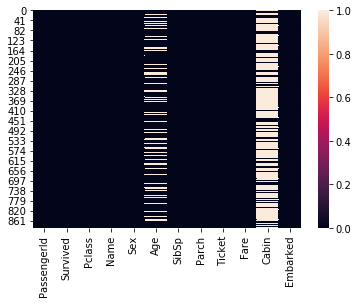

In [254]:
print(df.isnull().mean())
sb.heatmap(df.isnull())
plt.show()

#### 1.1. AGE 결측치 채워넣기
 - Title 에 따른 나이분포를 확인한다

In [272]:
# print(df.Name.head(10))
# print(df.Name.tail(10))
title = []
titleReg = re.compile(r',\s+(\w+).')
for name in df.Name : 
    title.append(titleReg.search(name).group(1))
title = pd.Series(title,name = 'title')
title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Lady          1
Mme           1
Ms            1
the           1
Jonkheer      1
Don           1
Sir           1
Name: title, dtype: int64

- Master : 18세 이하 남성
- Dr,Rev,Major,col,Capt ,Don,Sir-> Mr
- Mlle -> Miss,Jonkheer
- Lady,Mme -> Mrs

In [273]:
title[(title=='Dr') | (title == 'Rev' )| (title == 'Major') | (title == 'Col') | (title == 'Capt') | (title == 'Don') |( title == 'Sir') | (title == 'Jonkheer')] = 'Mr'
title[title == 'Mlle'] = 'Miss'
title[(title == 'Lady')|(title == 'Mme')|(title == 'Ms')|(title == 'the')] = 'Mrs'
title.value_counts()

Mr        538
Miss      184
Mrs       129
Master     40
Name: title, dtype: int64

In [274]:
dfTmp = df.copy()
dfTmp = pd.concat([dfTmp, title],axis = 1)

In [275]:
dfTmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [276]:
meanAge = dfTmp.loc[:,['Age','title']].groupby('title').mean()

In [277]:
n = dfTmp.shape[0]
Age = []
for i in range(n):
    if np.isnan(dfTmp.Age[i]):
        if dfTmp.title[i] == 'Mr': Age.append(float(meanAge.loc['Mr']))
        elif dfTmp.title[i] == 'Mrs' : Age.append(float(meanAge.loc['Mrs']))
        elif dfTmp.title[i] == 'Master' : Age.append(float(meanAge.loc['Master']))
        else : Age.append(float(meanAge.loc['Miss']))
    else:
        Age.append(dfTmp.Age[i])
dfTmp.Age = pd.Series(Age,name='Age')

In [278]:
# dfTmp[dfTmp.Age.isnull()].loc[title == 'Mr'].Age = meanAge.loc['Mr']
# dfTmp[dfTmp.Age.isnull()].loc[title == 'Mrs'].Age = meanAge.loc['Mrs']
# dfTmp[dfTmp.Age.isnull()].loc[title == 'Master'].Age = meanAge.loc['Master']
# dfTmp[dfTmp.Age.isnull()].loc[title == 'Miss'].Age = meanAge.loc['Miss']

#### 1.2. Embarked

In [279]:
dfTmp[dfTmp.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


- Cabin : B28, Pclass:1 ,Fare : 80 , 승선지에 따른 요금 분포 확인
- Embarked 는 C 로 결정

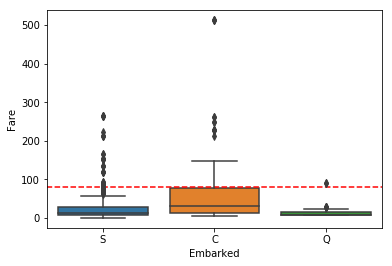

In [280]:
sb.boxplot(x = 'Embarked', y = 'Fare',data = dfTmp)
plt.hlines(y = 80, xmin = -1, xmax = 3,linestyles='dashed',colors='red') 
dfTmp.loc[61,'Embarked'] = 'C'
dfTmp.loc[829,'Embarked'] = 'C'

In [281]:
dfTmp.drop(columns='Cabin',inplace=True)
dfTmp.drop(columns= 'Name',inplace = True)
dfTmp.drop(columns = 'PassengerId',inplace = True)

In [282]:
dfTmp['FamSize'] = dfTmp['SibSp']+dfTmp['Parch']+1
dfTmp.drop(columns='SibSp',inplace = True)
dfTmp.drop(columns= 'Parch',inplace = True)
dfTmp.drop(columns = 'Ticket',inplace = True)

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
title       0
FamSize     0
dtype: int64


,Survived,Pclass,Sex,Age,Fare,Embarked,title,FamSize
0,0,3,male,22.0,7.2500,S,Mr,2
1,1,1,female,38.0,71.2833,C,Mrs,2
2,1,3,female,26.0,7.9250,S,Miss,1
3,1,1,female,35.0,53.1000,S,Mrs,2
4,0,3,male,35.0,8.0500,S,Mr,1


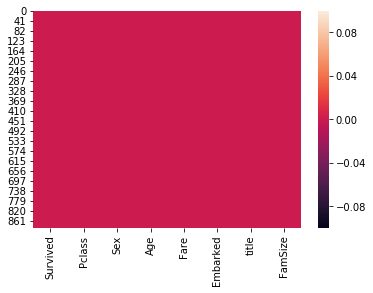

In [283]:
sb.heatmap(dfTmp.isnull());
print(dfTmp.isnull().sum())
dfTmp.head()

### 2. 데이터 탐색적 분석
    - 시각화(분포 확인)
    - 시각화(선형 여부 확인)
    - 가설검정(T, Chi2)

2.1. Survived ~ Age
 - 생존자가 더 어리다

Ttest_indResult(statistic=-2.7590341306760906, pvalue=0.005916353930719734)

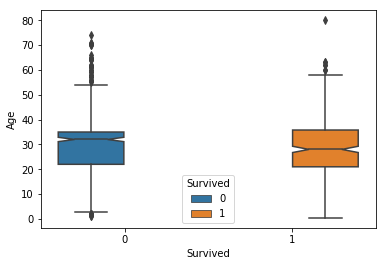

In [286]:
sb.boxplot(x = 'Survived', y = 'Age',hue = 'Survived',data = dfTmp,notch = True);
st.ttest_ind(dfTmp[dfTmp.Survived == 1].Age, dfTmp[dfTmp.Survived == 0].Age)

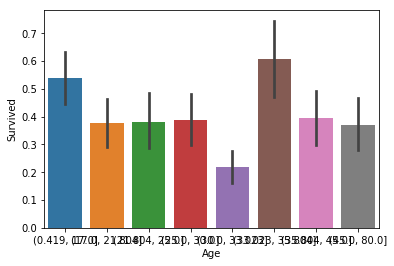

In [295]:
sb.barplot(x = pd.qcut(dfTmp.Age,8), y= 'Survived',data = dfTmp);
# 생존률과 선형관계를 만족하지 않기에, 추후 정렬을 다시 해줘야함

2.2. Survived ~ Pclass
- 생존률과 선형관계

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

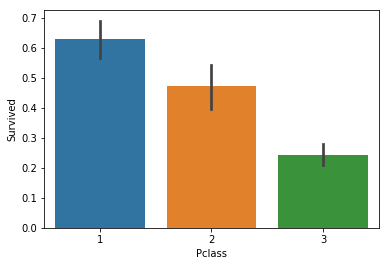

In [297]:
sb.barplot(x = 'Pclass',y = 'Survived', data = df);
st.chi2_contingency(pd.crosstab(df.Pclass,df.Survived))

2.3. Survived ~ Sex

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

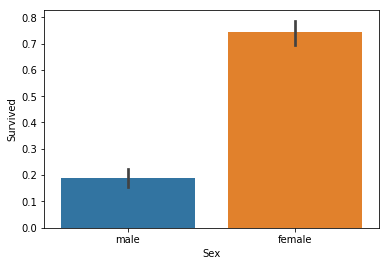

In [300]:
sb.barplot(x = 'Sex',y = 'Survived', data = dfTmp)
st.chi2_contingency(pd.crosstab(df.Sex,df.Survived))

2.4. Survived ~ Embarked

(28.005088727541892,
 8.294156968447598e-07,
 2,
 array([[104.74747475,  65.25252525],
        [ 47.44444444,  29.55555556],
        [396.80808081, 247.19191919]]))

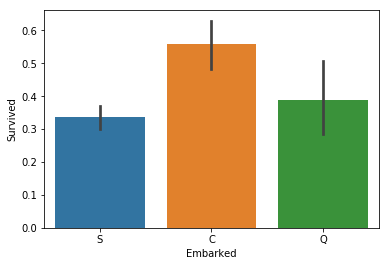

In [307]:
sb.barplot(x = 'Embarked',y = 'Survived',data = dfTmp)
st.chi2_contingency(pd.crosstab(dfTmp.Embarked,dfTmp.Survived))

2.5. Survived ~ Fare
 - 죽은 사람의 운임이 평균적으로 더 적다.

Ttest_indResult(statistic=-7.939191660871055, pvalue=6.120189341924198e-15)

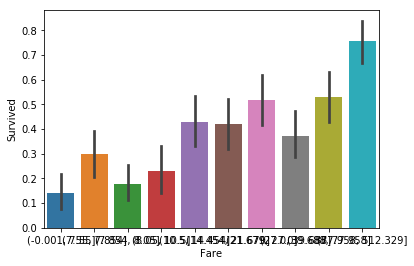

In [312]:
sb.barplot(x = pd.qcut(dfTmp.Fare,10),y = 'Survived',data = dfTmp)
st.ttest_ind(dfTmp[dfTmp.Survived==0].Fare, dfTmp[dfTmp.Survived==1].Fare)

2.6. Survived ~ title

(290.48495305881914,
 1.1402057054116866e-62,
 3,
 array([[ 24.64646465,  15.35353535],
        [113.37373737,  70.62626263],
        [331.49494949, 206.50505051],
        [ 79.48484848,  49.51515152]]))

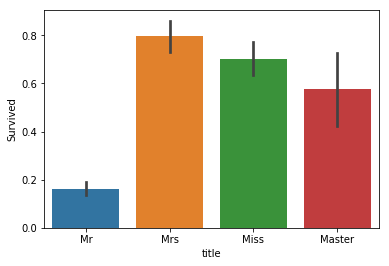

In [316]:
sb.barplot(x = 'title', y = 'Survived',data =dfTmp)
st.chi2_contingency(pd.crosstab(dfTmp.title,dfTmp.Survived))

2.6. Survived ~ FamSize

(80.67231343783078,
 3.579668975443533e-14,
 8,
 array([[330.87878788, 206.12121212],
        [ 99.2020202 ,  61.7979798 ],
        [ 62.84848485,  39.15151515],
        [ 17.86868687,  11.13131313],
        [  9.24242424,   5.75757576],
        [ 13.55555556,   8.44444444],
        [  7.39393939,   4.60606061],
        [  3.6969697 ,   2.3030303 ],
        [  4.31313131,   2.68686869]]))

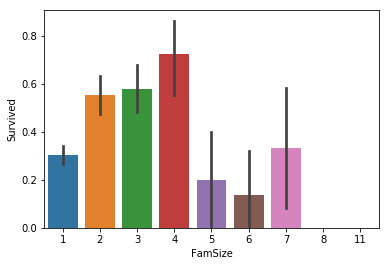

In [323]:
sb.barplot(x='FamSize',y = 'Survived', data = dfTmp)
st.ttest_ind(dfTmp[dfTmp.Survived == 0].FamSize, dfTmp[dfTmp.Survived == 1].FamSize) # 수치형 변수로는 의미가 없음
st.chi2_contingency(pd.crosstab(dfTmp.FamSize, dfTmp.Survived)) # 명목형 변수로는 의미 있음

In [333]:
n = dfTmp.shape[0]
fam = []
for i in range(n):
    if dfTmp.FamSize[i] == 1:fam.append('single')
    elif 1<dfTmp.FamSize[i]<5 : fam.append('small')
    elif 5<dfTmp.FamSize[i]<8 : fam.append('big')
    else : fam.append('large')
dfTmp['Fam'] = pd.Series(fam)

(75.17022035875016,
 3.3313740311437454e-16,
 3,
 array([[ 20.94949495,  13.05050505],
        [ 17.25252525,  10.74747475],
        [330.87878788, 206.12121212],
        [179.91919192, 112.08080808]]))

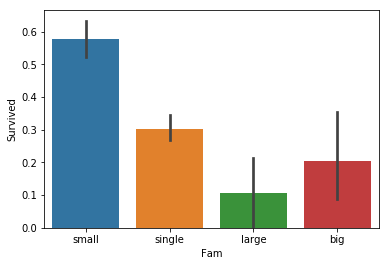

In [332]:
sb.barplot(x = 'Fam', y= 'Survived', data = dfTmp);
st.chi2_contingency(pd.crosstab(dfTmp.Fam,dfTmp.Survived))

### 3. 모델링

In [529]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#### 3.1. Feature Eng

In [480]:
df = dfTmp.copy()

In [481]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,FamSize,Fam
0,0,3,male,22.0,7.2500,S,Mr,2,small
1,1,1,female,38.0,71.2833,C,Mrs,2,small
2,1,3,female,26.0,7.9250,S,Miss,1,single
3,1,1,female,35.0,53.1000,S,Mrs,2,small
4,0,3,male,35.0,8.0500,S,Mr,1,single


In [482]:
n = df.shape[0]

In [483]:
#Age
LE = LabelEncoder()
df['AgeCut'] = LE.fit_transform(pd.qcut(df.Age,5))

In [484]:
ageLi = list(df.loc[:,['Survived','AgeCut']].groupby('AgeCut').mean().sort_values(by = 'Survived',ascending = True).index)
ageDic = {ageLi[i]:i for i in range(0,len(ageLi))}
df['AgeCut'] = df.AgeCut.apply(lambda x : ageDic[x])

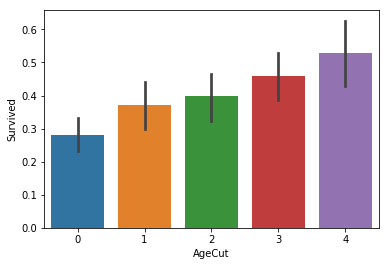

In [485]:
sb.barplot(x= 'AgeCut',y = 'Survived',data =df)

In [486]:
#Fare
LE = LabelEncoder()
df['FareCut'] = LE.fit_transform(pd.qcut(df.Fare,20))

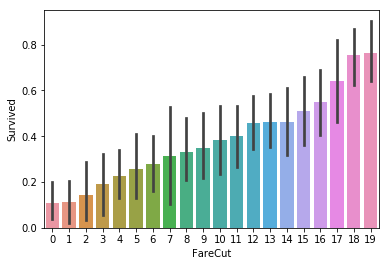

In [487]:
fl = list(df.loc[:,['FareCut','Survived']].groupby('FareCut').mean().sort_values(by = 'Survived').index)
fdic = {fl[i]: i for i in range(0,len(fl))}
df['FareCut'] = df.FareCut.apply(lambda x : fdic[x])
sb.barplot(x = 'FareCut', y= 'Survived',data = df);

0     small
1     small
2    single
3     small
4    single
Name: Fam, dtype: object

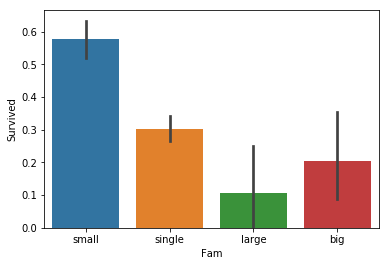

In [488]:
#Fam
sb.barplot(x= 'Fam', y = 'Survived',data = df)
df.Fam.head()

In [498]:
# FAM 은 더미변수로 치환
fd = pd.get_dummies(df.Fam,drop_first= True, prefix= 'Fam')
#df = df.join(fd)

In [502]:
# Sex
LE = LabelEncoder()
df.Sex = LE.fit_transform(df.Sex)

In [507]:
# Embarked
dic = {'S':0,'Q':1,'C':2}
df.Embarked = df.Embarked.apply(lambda x : dic[x])

In [511]:
# Titie
td = pd.get_dummies(df.title, drop_first= True, prefix= 'title')
df= df.join(td)

In [515]:
dfFin = df.drop(columns=['title','Fam','Age','Fare'])

In [517]:
dfFin.head()

,Survived,Pclass,Sex,Embarked,FamSize,AgeCut,FareCut,Fam_large,Fam_single,Fam_small,title_Miss,title_Mr,title_Mrs
0,0,3,1,0,2,2,3,0,0,1,0,1,0
1,1,1,0,2,2,4,16,0,0,1,0,0,1
2,1,3,0,0,1,2,4,0,1,0,1,0,0
3,1,1,0,0,2,4,15,0,0,1,0,0,1
4,0,3,1,0,1,4,4,0,1,0,0,1,0


### 3.2. Logistic 

In [526]:
x = np.array(dfFin.drop(columns='Survived'))
y = np.array(dfFin.Survived)

In [527]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.7, random_state = 3)

In [528]:
glm = LogisticRegression()
glm.fit(xTrain,yTrain)
yPred = glm.predict(xTest)
acc = metrics.accuracy_score(yTest,yPred)
print(acc)

0.8237179487179487


d:\pl\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 3.3 SVM

In [530]:
C_grid = [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
gamma_grid = [0.0001, 0.0002,0.0005, 0.0006, 0.0007, 0.0008, 0.001,  0.002, 0.005]
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5);
gridCV.fit(xTrain, yTrain)
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

In [533]:
SVM_best = SVC(C=best_C,gamma=best_gamma)
SVM_best.fit(xTrain, yTrain);
y_pred = SVM_best.predict(xTest)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(yTest,y_pred),3)))

SVM best accuracy : 0.821
